In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = 'NVDA.csv'

In [31]:
df = pd.read_csv(path, encoding='latin-1') # or 'cp1252'
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00-05:00,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0
2,1999-01-26 00:00:00-05:00,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0
3,1999-01-27 00:00:00-05:00,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0
4,1999-01-28 00:00:00-05:00,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0


Descrizione tabella:
- Date: La data del record (formato timestamp).

- Open, High, Low, Close: Prezzi di apertura, massimo, minimo e chiusura.
- Volume: Quantità di azioni scambiate.
- Dividends: Dividendi distribuiti (spesso zero).
- Stock Splits: Eventuali frazionamenti azionari.


2) Analisi Esplorativa dei dati (EDA)

In [32]:
df['Date'] = pd.to_datetime(df['Date'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6513 non-null   object 
 1   Open          6513 non-null   float64
 2   High          6513 non-null   float64
 3   Low           6513 non-null   float64
 4   Close         6513 non-null   float64
 5   Volume        6513 non-null   int64  
 6   Dividends     6513 non-null   float64
 7   Stock Splits  6513 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 407.2+ KB


In [34]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6513.000000,6513.000000,6513.000000,6513.000000,6.513000e+03,6513.000000,6513.000000
mean,7.902262,8.046122,7.745036,7.902351,6.015231e+08,0.000028,0.003301
std,21.597247,21.979239,21.151316,21.581519,4.311052e+08,0.000359,0.141388
min,0.032003,0.032600,0.030569,0.031286,1.968000e+07,0.000000,0.000000
25%,0.256325,0.263662,0.249906,0.256325,3.410440e+08,0.000000,0.000000
50%,0.434869,0.441264,0.427963,0.434928,5.032080e+08,0.000000,0.000000
75%,4.429733,4.493741,4.360737,4.440177,7.326600e+08,0.000000,0.000000
max,149.339720,152.879470,146.249911,148.869751,9.230856e+09,0.010000,10.000000


3) Visualizzazione

In [35]:
# Using plotly.express
import plotly.express as px

#df = px.data.stocks()
fig = px.line(df, x='Date', y="Close") #metti nelle y una media tra prezzo più basso e più alto della giornata
fig.show()

In [36]:
# define numeric and categorical columns
num_col = df.describe().columns.tolist()
all_col = df.columns.tolist()
obj_col = [i for i in all_col if i not in num_col]

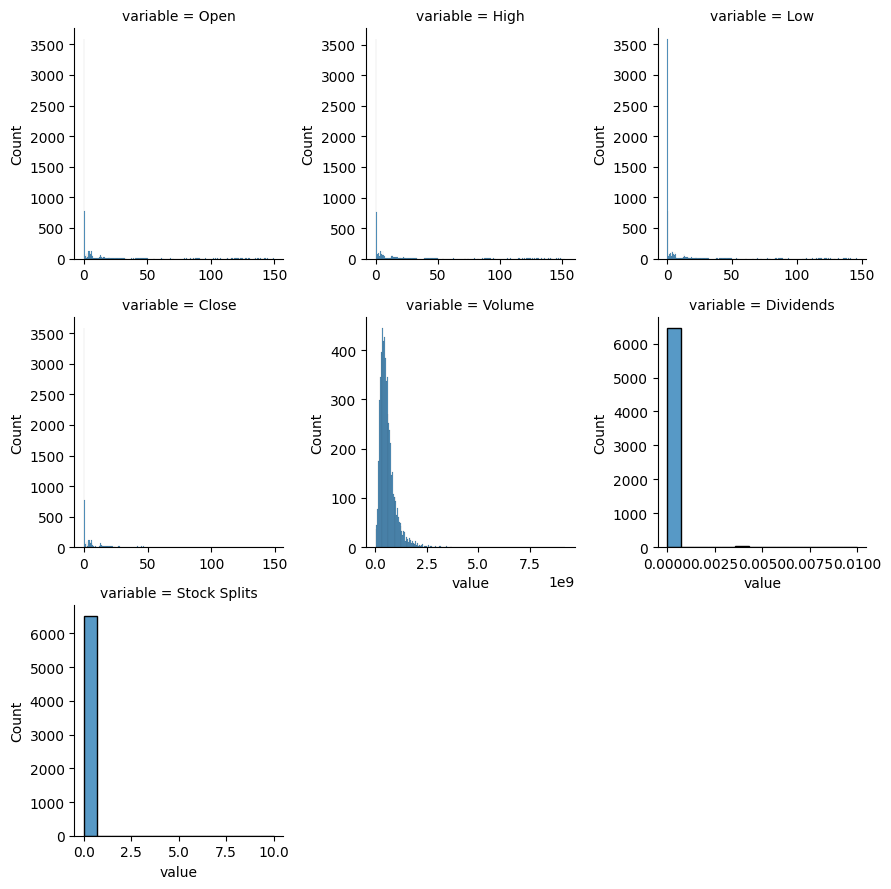

In [37]:
def viz(df, types):
    # Reshape the dataframe to long format
    f = pd.melt(df, value_vars=df.select_dtypes(include=['number']).columns)
    
    # Create a FacetGrid for the different columns
    g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
    
    # Map the function to the grid; `types` should be sns.histplot or similar
    g = g.map(types, "value")
    
    # Show the plot
    plt.show()
    return g

# Esempio di visualizzazione dell'istogramma
viz(df, sns.histplot)

In [38]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Date[object],1. 1999-01-22 00:00:00-05:002. 2016-04-21 00:00:00-04:003. 2016-05-05 00:00:00-04:004. 2016-05-04 00:00:00-04:005. 2016-05-03 00:00:00-04:006. 2016-05-02 00:00:00-04:007. 2016-04-29 00:00:00-04:008. 2016-04-28 00:00:00-04:009. 2016-04-27 00:00:00-04:0010. 2016-04-26 00:00:00-04:0011. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)6,503 (99.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/GU6VOAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Open[float64],Mean (sd) : 7.9 (21.6)min < med < max:0.0 < 0.4 < 149.3IQR (CV) : 4.2 (0.4),"6,496 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/GU6VOAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACHklEQVR4nO3XvY7aUBCG4Rn+ZC/EFiCZjiZ9Ckr6tLnYbdP7LtIjJAts4YWAnJMuTZSw2Gsln/Z9amZsWa/sg4cQDPjfDf71DQCvMbr3A3ePzWzScv81hHBuOQv88tdQ3T1eLpdfkiSZt1leVdXB3Z+JFV3de6NOkiSZb7fbc5qml0cWl2UZ5Xk+L4piYmaEik7ufvrNzNI0vWRZ9tJif9xiBvgNf6YggVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhYdTn8qZpxmaWuHvbFdcQwvkNbwmiegu1ruvx7Xb7tF6vh8Ph8NJmR1VVB3d/Jlb0Fur1eh1FUfS02Wwuq9Xq8Oh8WZZRnufzoigmZkao71yvn34zs+l0esmy7KXlePymNwNZvYfaRccz7sDMfnS4/Ls7H7t7bGaTDit6e2avCrUsy+jRxafTKTIzq+s62u/3T4/O73a7D23PuE3TjOu6/jibzb4NBoPbo9c2Mzsejyd3/2pmrc7XgqLFYvE5TdNZ2wUdn9n3EMIf534C95CCkUhg/ywAAAAASUVORK5CYII="">",0(0.0%)
3,High[float64],Mean (sd) : 8.0 (22.0)min < med < max:0.0 < 0.4 < 152.9IQR (CV) : 4.2 (0.4),"6,486 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/GU6VOAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACJklEQVR4nO3XvY7aQBSG4XP4k1mILUAyHU36FJT0aXOx26b3XaRHSBbYwgsBOZMuTZTs2l5v9lPep2bOnOIVDB5CMOC9G/zrBYCXGD33AXefmtmk5fxbCOHS8izwy19DdffparX6Esfxos3wsiyP7v5IrOjquW/USRzHi91ud0mS5NpkcFEUUZZlizzPJ2ZGqOjk2Z9+M7MkSa5pmj61mD9tcQb4DX+mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIWHU5/C6rsdmFrt72xG3EMLlFVeCqN5CrapqfL/fP202m+FwOLy2mVGW5dHdH4kVvYV6u91GURQ9bLfb63q9PjY9XxRFlGXZIs/ziZkR6n+u159+M7PZbHZN0/Sp5fHpqy4DWb2H2kXHN+7AzH50uL71+9jdp2Y2eet7u+q4t1mPu78o1KIooqaDz+dzZGZWVVV0OBwemp7f7/cf2r5x67oeV1X1cT6ffxsMBvemd5uZnU6ns7t/NbOm7+touVx+TpJk/sb3dtVpb7POu38PIfzx3E+I1I3HyavXRAAAAABJRU5ErkJggg=="">",0(0.0%)
4,Low[float64],Mea

In [39]:
corrmat = df.corr(numeric_only=True)
corrmat

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999874,0.999801,0.999623,-0.149837,0.086966,0.055902
High,0.999874,1.000000,0.999802,0.999812,-0.149139,0.086838,0.056150
Low,0.999801,0.999802,1.000000,0.999865,-0.150915,0.087383,0.055406
Close,0.999623,0.999812,0.999865,1.000000,-0.150128,0.087206,0.056630
Volume,-0.149837,-0.149139,-0.150915,-0.150128,1.000000,-0.038245,-0.002834
Dividends,0.086966,0.086838,0.087383,0.087206,-0.038245,1.000000,-0.001835
Stock Splits,0.055902,0.056150,0.055406,0.056630,-0.002834,-0.001835,1.000000


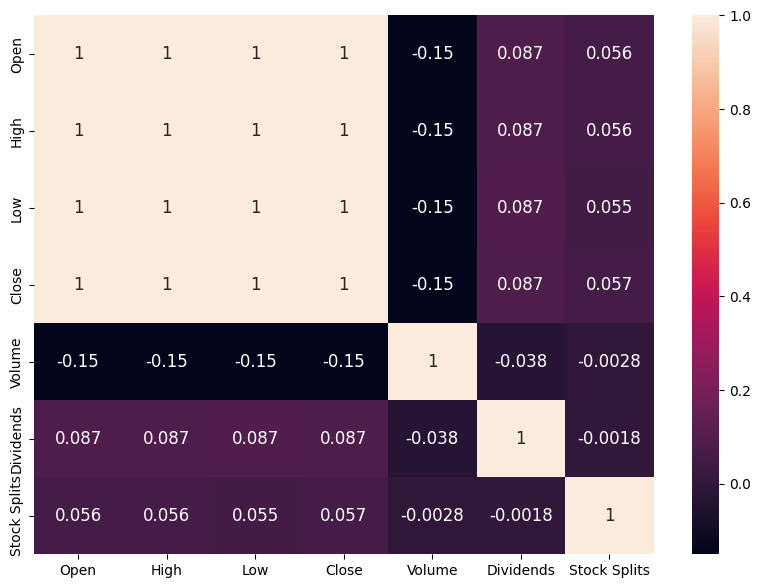

In [40]:
plt.figure(figsize = (10, 7))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12});

In [41]:
#STEP 0 FILTERING
#remove features not useful
features_to_remove = ['Date', 'Dividends', 'Stock Splits']
df_clean = df.drop(features_to_remove, axis=1)

In [42]:
# STEP 1 - TRAIN TEST SPLITTING
#Feature matrix and target vector
X_ = df_clean.drop(['Close'], axis=1) # matrice Features
y = df_clean['Close']                #Target

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)

X = standardized_data

In [44]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [45]:
regressors =   [XGBRegressor(),
                SVR(),
                ElasticNet(),
                KNeighborsRegressor(),
                LinearRegression(),
                GradientBoostingRegressor(),
                RandomForestRegressor(),
                DecisionTreeRegressor(),
                ]

In [46]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

metrics_dict = {'ModelName': [], 'R2Score': [], 'RMSE': [], 'MSE': [], 'MAE': []}

# Loop through each regressor
for reg in regressors:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    model_name = type(reg).__name__
    metrics_dict['ModelName'].append(model_name)
    
    # R2 score
    metrics_dict['R2Score'].append(r2_score(y_test, y_pred))
    
    # RMSE using root_mean_squared_error from sklearn
    metrics_dict['RMSE'].append(mean_squared_error(y_test, y_pred) ** .5)  # Root MSE instead of squared=False
    
    # MSE (Mean Squared Error)
    metrics_dict['MSE'].append(mean_squared_error(y_test, y_pred))  # Default squared=True for MSE
    
    # MAE (Mean Absolute Error)
    metrics_dict['MAE'].append(mean_absolute_error(y_test, y_pred))

# Create DataFrame
metrics_df = pd.DataFrame(metrics_dict).set_index('ModelName').sort_values('R2Score', ascending=False)
print(metrics_df)


                            R2Score      RMSE        MSE       MAE
ModelName                                                         
LinearRegression           0.999889  0.226824   0.051449  0.064750
RandomForestRegressor      0.999732  0.352146   0.124007  0.098214
GradientBoostingRegressor  0.999690  0.378859   0.143534  0.124130
DecisionTreeRegressor      0.999609  0.425535   0.181080  0.114767
KNeighborsRegressor        0.999476  0.492933   0.242983  0.180724
XGBRegressor               0.998035  0.954340   0.910764  0.207911
ElasticNet                 0.973015  3.536698  12.508232  1.831030
SVR                        0.968320  3.832046  14.684574  0.614598


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create the parameter grid for LinearRegression (appropriate parameters)
param_grid = {
    'lr__fit_intercept': [True, False],  # Whether to calculate the intercept for this model
}

# Create a pipeline: scaling data + Linear Regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler to normalize the features
    ('lr', LinearRegression())     # The actual Linear Regression model
])

# Setup GridSearchCV for LinearRegression
grid_search_lr = GridSearchCV(estimator=pipeline,
                               param_grid=param_grid,
                               cv=5,           # 5-fold cross-validation
                               n_jobs=-1,      # Use all cores for parallel processing
                               verbose=2)      # Display verbose output during fitting

# Execute the grid search (on training data)
grid_search_lr.fit(X_train, y_train)

# Get best parameters and best estimator
print("Best parameters:", grid_search_lr.best_params_)
print("Best model:", grid_search_lr.best_estimator_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .............................lr__fit_intercept=True; total time=   0.0s
[CV] END .............................lr__fit_intercept=True; total time=   0.0s
[CV] END .............................lr__fit_intercept=True; total time=   0.0s
[CV] END .............................lr__fit_intercept=True; total time=   0.0s
[CV] END ............................lr__fit_intercept=False; total time=   0.0s
[CV] END .............................lr__fit_intercept=True; total time=   0.0s
[CV] END ............................lr__fit_intercept=False; total time=   0.0s
[CV] END ............................lr__fit_intercept=False; total time=   0.0s
[CV] END ............................lr__fit_intercept=False; total time=   0.0s
[CV] END ............................lr__fit_intercept=False; total time=   0.0s
Best parameters: {'lr__fit_intercept': True}
Best model: Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())]

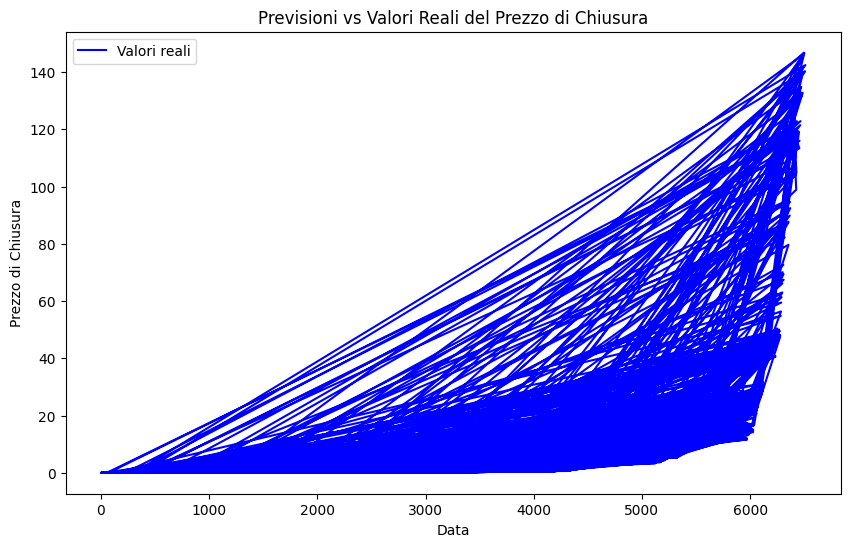

array([[ 0.20912695,  0.19991105,  0.17930202, -0.1355019 ],
       [-0.35990412, -0.35984715, -0.3600616 ,  1.86152839],
       [ 0.2330179 ,  0.22481647,  0.23856141, -0.9099617 ],
       ...,
       [ 0.2922708 ,  0.2890094 ,  0.29292418, -0.44415329],
       [ 1.53593802,  1.53358169,  1.54711162, -0.4952654 ],
       [-0.36242003, -0.36262905, -0.36298826, -0.4516068 ]])

In [49]:
# Creazione del modello
model = LinearRegression()

# Allenamento del modello
model.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Visualizzazione delle previsioni rispetto ai valori reali
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Valori reali", color='blue')
#plt.plot(y_test.index, y_pred, label="Previsioni", color='red', linestyle='--')
plt.title("Previsioni vs Valori Reali del Prezzo di Chiusura")
plt.xlabel("Data")
plt.ylabel("Prezzo di Chiusura")
plt.legend()
plt.show()
y_pred
X_train

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
rfe = RFE(estimator=lr)
rfe.fit(X, y)

selected_features_indices = rfe.get_support(indices=True)

# Ottieni i nomi delle caratteristiche selezionate dal DataFrame
selected_features_names = df.columns[selected_features_indices]

features = []
for name in selected_features_names:
    features.append(name)
features

['Open', 'High']